In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv("ratings_Electronics.csv", names=['userId', 'productId', 'rating', 'timestamp'])

In [5]:
df.shape

(7824482, 4)

In [6]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [5]:
electronics_data = df.sample(n=1564896, ignore_index=True)

In [6]:
del df 

In [7]:
electronics_data.head()

,userId,productId,rating,timestamp
0,A31FK5I79CEPBG,B0038L495U,3.0,1351209600
1,A13Q539VMRUO0O,B000VDCT3C,5.0,1302739200
2,A11IO166K1IJ9X,B00004U8P2,5.0,1037491200
3,A7FN266S3AXR0,B006RLWE00,5.0,1359158400
4,A2NSMHRO4IU404,B002LITFP0,5.0,1318809600


In [8]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [9]:
electronics_data.drop('timestamp', axis=1, inplace=True)

In [10]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.013404e+00
std,1.380717e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [11]:
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [12]:
electronics_data[electronics_data.duplicated()].shape[0]

0

In [13]:
electronics_data.head()

,userId,productId,rating
0,A31FK5I79CEPBG,B0038L495U,3.0
1,A13Q539VMRUO0O,B000VDCT3C,5.0
2,A11IO166K1IJ9X,B00004U8P2,5.0
3,A7FN266S3AXR0,B006RLWE00,5.0
4,A2NSMHRO4IU404,B002LITFP0,5.0


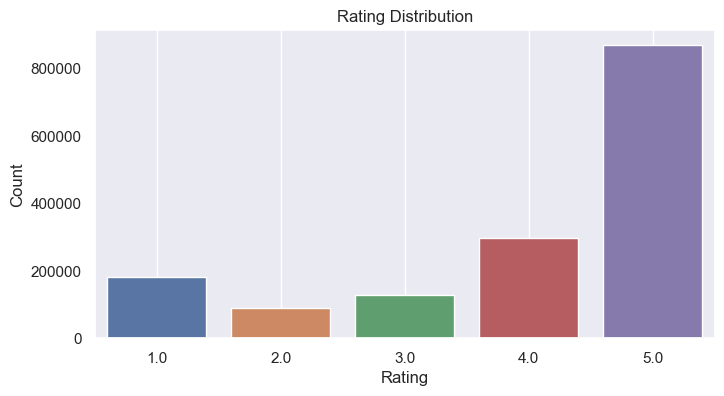

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating', data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [15]:
print('Total rating:', electronics_data.shape[0])
print('Total uniue users:', electronics_data['userId'].unique().shape[0])
print('Total unique products:', electronics_data['productId'].unique().shape[0])

Total rating: 1564896
Total uniue users: 1224983
Total unique products: 238007


In [16]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
ADLVFFE4VBT8      109
A5JLAU2ARJ0BO     108
A3OXHLG6DIBRW8    106
A680RUE1FDO8B      90
A6FIAB28IS79       88
Name: rating, dtype: int64

In [17]:
print('No of rated product more than 50 per user: {}'.format(sum(no_of_rated_products_per_user >= 50)))


No of rated product more than 50 per user: 27


In [18]:
data = electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)


In [19]:
data.head()

,userId,productId,rating
0,A31FK5I79CEPBG,B0038L495U,3.0
1,A13Q539VMRUO0O,B000VDCT3C,5.0
7,A3UFYYXJP6KSFR,B002IO2UM2,3.0
8,A3VNOTO0IWDHBY,B004CAJU8W,5.0
9,A1MKSXIM6UFNVU,B002FFZGCU,5.0


In [20]:
no_of_rating_per_product = data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [21]:
no_of_rating_per_product.head()

productId
B0074BW614    3623
B00DR0PDNE    3202
B007WTAJTO    2827
B006GWO5WK    2490
B0019EHU8G    2457
Name: rating, dtype: int64

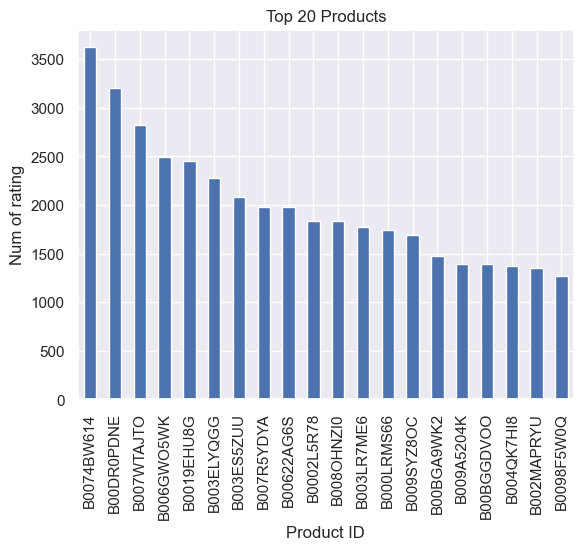

In [22]:
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Num of rating')
plt.title('Top 20 Products')
plt.show()

In [23]:
mean_rating_product_count = pd.DataFrame(data.groupby('productId')['rating'].mean())

In [24]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.317949
1400501466,3.788462
1400532655,3.666667
140053271X,3.949495
B00000J1V5,4.440000


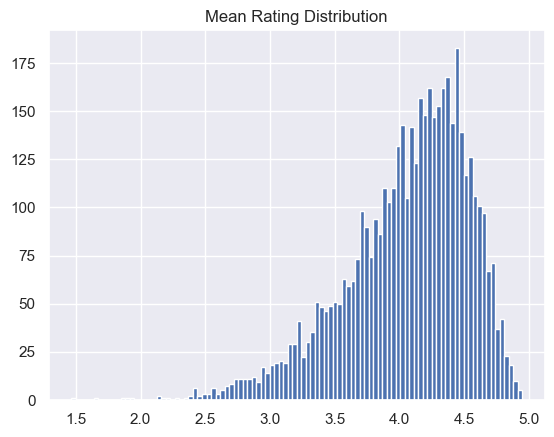

In [25]:
plt.hist(mean_rating_product_count['rating'], bins=100)
plt.title('Mean Rating Distribution')
plt.show()

In [26]:
mean_rating_product_count['rating'].skew()

-0.907869502150127

In [27]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [28]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.317949,195
1400501466,3.788462,52
1400532655,3.666667,99
140053271X,3.949495,99
B00000J1V5,4.440000,75


In [29]:
mean_rating_product_count[mean_rating_product_count['rating_counts'] == mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.524427,3623


In [30]:
print('Min average rating product:', mean_rating_product_count['rating_counts'].min())
print('Total min average rating products:', mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()])


Min average rating product: 50
Total min average rating products:             rating  rating_counts
productId                        
B00000K135    4.74             50
B00001W0DI    4.26             50
B00006JPDI    4.62             50
B00009LI55    3.96             50
B0001GZ87I    4.54             50
...            ...            ...
B00EL0EIGC    4.62             50
B00FBSFYAC    4.26             50
B00FY2SBR8    4.06             50
B00HWMPRKM    4.26             50
B00J46VVKE    4.60             50

[116 rows x 2 columns]


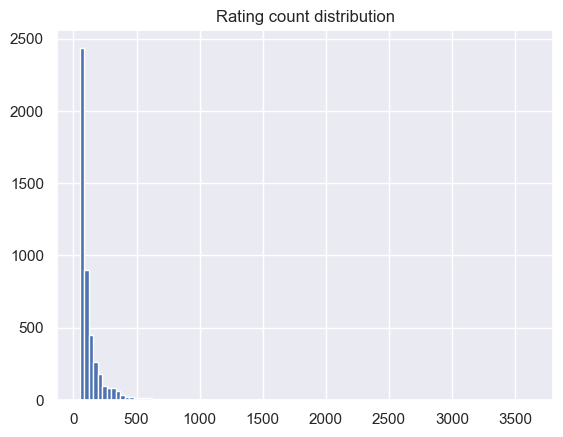

In [31]:
plt.hist(mean_rating_product_count['rating_counts'], bins=100)
plt.title('Rating count distribution')
plt.show()

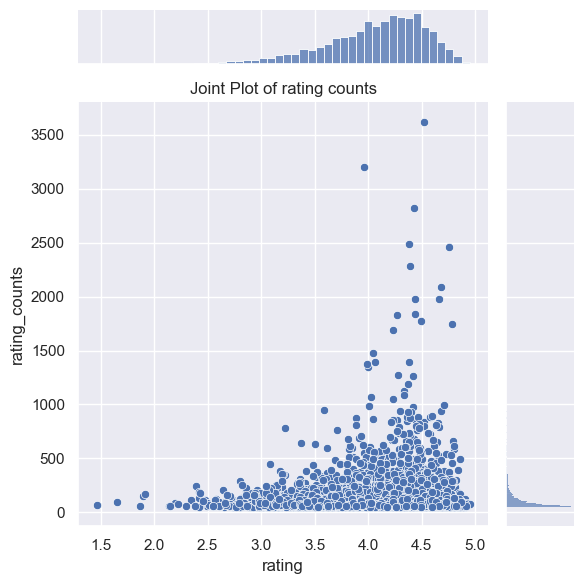

In [32]:
sns.jointplot(x='rating', y='rating_counts', data=mean_rating_product_count)
plt.title('Joint Plot of rating counts')
plt.tight_layout()
plt.show()

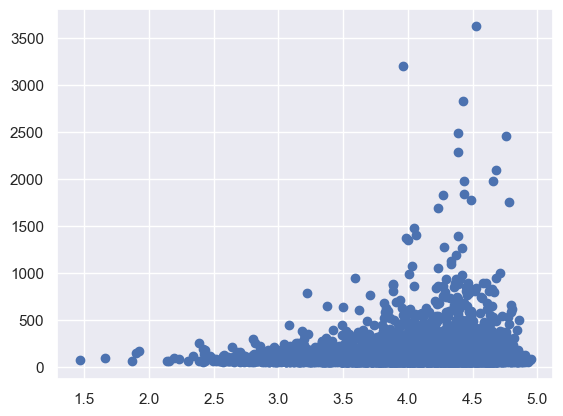

In [33]:
plt.scatter(x=mean_rating_product_count['rating'], y=mean_rating_product_count['rating_counts'])
plt.show()

In [34]:
print('Correlation between Rating and Rating Count is: {}'.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Count is: 0.10946074590132805


In [37]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [38]:
reader = Reader(rating_scale=(1,5))
surprise_data = Dataset.load_from_df(data, reader)

In [39]:
trainset, testset = train_test_split(surprise_data, test_size=0.3, random_state=42)


In [40]:
algo = KNNWithMeans(k=5, sim_options = {'name': 'pearson_baseline', 'user_based':False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [41]:
test_pred = algo.test(testset)

In [42]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3089


1.3089371896287703

In [44]:
data2 = data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index ='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,B00000J1V5,B00000JDF5,B00000JI4F,B00000K2YR,B00001P4XA,B00001P4ZH,B00001P4ZR,...,B00HWMPRKM,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IAAALFG,B00IF70QCW,B00INNP5VU,B00ISGCAJM,B00IVPU786,B00J46VVKE
userId,,,,,,,,,,,,,,,,,,,,,
A00317262XRVTNR5YJQYQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01472621EMGV3S6K7TRL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A015127039CD56EIHHP92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A016895031Y39HU9LBV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01778503JY5HBD9ZT3HJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
ratings_matrix.shape

(19884, 4383)

In [46]:
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00317262XRVTNR5YJQYQ,A01472621EMGV3S6K7TRL,A015127039CD56EIHHP92,A016895031Y39HU9LBV,A01778503JY5HBD9ZT3HJ,A021107112W946RL28SWJ,A0269980Q6K7E9SH4XN9,A029365219FB802HGQKX7,A03141623SFDIG9DCIUPJ,A0455448C6UP35XRLWCT,...,AZYILWL6S0WV6,AZYPOLLSDVG4K,AZYZM1MLQE159,AZZ77XYX8O2WE,AZZ877RHES6DQ,AZZKQRD1G1KTE,AZZML3F0IW99N,AZZNLB4X2FI4A,AZZNUQKJXI0JI,AZZTC2OYVNE2Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J1V5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000JDF5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x_ratings_matrix.shape

(4383, 19884)

In [48]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix=SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4383, 10)

In [49]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4383, 4383)

In [50]:
x_ratings_matrix.index[10]

'B00001W0DH'

In [52]:
i="B00001P4ZH"
product_names = list(x_ratings_matrix.index)
product_id = product_names.index(i)
print(product_id)

8


In [53]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4383,)

In [54]:
correlation_matrix[correlation_product_ID > 0.85].shape

(186, 4383)

In [56]:
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['0972683275',
 '1400532655',
 'B00001P4ZH',
 'B00004SABB',
 'B00004SABJ',
 'B00004T1XK',
 'B00005BC0K',
 'B0000645RH',
 'B000067SMH',
 'B00007E7JU',
 'B000097O5F',
 'B00009UT9B',
 'B0000BYDKO',
 'B0001BVXI6',
 'B0001D3K8A',
 'B0001FTVEA',
 'B00021XIJW',
 'B0002KVQBA',
 'B0002RBQO0',
 'B0002WPSBC']